In [1]:
import pandas as pd
from pandas import DataFrame
import json
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [2]:
data_path = './data/cleveland/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'

users = load_jsons(data_path, user_file)
reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
reviews = reviews.drop(columns = ['review_id', 'useful', 'funny', 'cool', 'text', 'date'])

In [3]:
good_businesses = list(businesses.loc[businesses['review_count'] >= 300]['business_id'])
good_users = list(users.loc[users['review_count'] >= 4]['user_id'])
    
reviews_good = reviews[reviews['business_id'].isin(good_businesses)]
reviews_best = reviews_good[reviews_good['user_id'].isin(good_users)]

display(reviews_best.head())

,user_id,business_id,stars
2,vDlrf84X8yu-CZ-8isrOSw,anzCdD5eIEHwydTpXhLlUA,4.0
11,kZGPhhKHP-ziJ5ve7k08ew,vdloJPM3bSpQTMlwdFek2A,3.0
12,YU9z6RBQTOg-ZuM9ADPwFw,vdloJPM3bSpQTMlwdFek2A,4.0
17,TfmeVvNr5MiXaJDV9IdULA,vdloJPM3bSpQTMlwdFek2A,4.0
37,RlpkcJqctkKXl-LO1IAtig,5VXxZIMgoKRWbNa6x9kMfw,4.0


In [4]:
def data_split(data, d = 0.8):
    np.random.seed(seed=5)
    test = np.random.rand(data.shape[0]) < d
    return data[test], data[~test] 

training_set, test_set = data_split(reviews_best)

In [5]:
def pivot_ratings(reviews):
    """ takes a rating table as input and computes the utility matrix """
    utility_df = reviews.pivot_table(index='business_id', columns='user_id', values='stars')
    return utility_df   

utility_matrix = pivot_ratings(training_set)
display(utility_matrix.head(10))

user_id,--Awhttr0FhVud5prVpVlA,--_nP6G2mAHyrEFtIG6ggw,--amZ_cR9Zgu4B1RrAHJyA,-0Xu57zrI3Rxi8wGZsnWKQ,-0x2ov-qcCopv32Imm-TYg,-15vBHK0n-ejyxY418MvHA,-1gsm9r8FAvnbbio8mz0sw,-1kZ1AjX3ycFVRllm7BCDg,-2R-JDElzGX-jCJKNWCMaQ,-2p_A5675Eh6gcZIGkf2Yw,...,zvoKQvcCsnJeC7ZRKrsWPA,zw6YMjaWYgpe0PQQfJbOkg,zwCc2g3P6ZgvZ7EvCRWzuA,zwFfSeQoLaeWUptFoo_hOA,zxA6KTqMirq7EsaIH93LSA,zxF7vwh32ccSN3CbCMlalw,zxL2Wdz18-Op_fBOSYEhuA,zxRHyxQm-32j5Z7Pi7bHCA,zxmQgVo3BJxHxpRqGQZJgA,zyrsLcN4dyRaySc257MsaQ
business_id,,,,,,,,,,,,,,,,,,,,,
-Eu04UHRqmGGyvYRDY8-tg,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1gQrMs-I8oKg2p-iRxznzQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1veVZUawy7IhIc5oDpRRQA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4IGaWH9jUYMtP2uHIFEqFQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5VXxZIMgoKRWbNa6x9kMfw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9LAXz_VfATZ0kLdaavkN4g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9SrZRDl7-ZfuENCo0DjfsQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AbPQf-X7awuPFDULiJ43bg,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0
AwlvIsKDqB5LeKNWC6k4kQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
"""Filter out users that are in testset but not in trainingset"""
test_users = set(test_set['user_id'])
training_users = set(training_set['user_id'])
drop_users = test_users - training_users
test_set = test_set[~test_set['user_id'].isin(drop_users)]

In [7]:
def pearson(matrix, id1, id2):
    """Compute pearson."""    
    selected_features = matrix.loc[id1].notna() & matrix.loc[id2].notna()
    
    if not selected_features.any():
        return np.nan
    
    features1 = matrix.loc[id1][selected_features]
    features2 = matrix.loc[id2][selected_features]
    
    return sp.stats.pearsonr(features1, features2)[0]

In [8]:
def create_similarity_matrix_pearson(matrix):
    """creates the similarity matrix based on pearson correlation."""
    similarity_matrix = pd.DataFrame(0, index=matrix.index, columns=matrix.index, dtype=float)
    
    for business_id in similarity_matrix.index:
        for business_id2 in similarity_matrix.columns:
            similarity_matrix.at[business_id, business_id2] = pearson(matrix, business_id, business_id2)
    
    return similarity_matrix

similarity = create_similarity_matrix_pearson(utility_matrix)
display(similarity.head(20))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


business_id,-Eu04UHRqmGGyvYRDY8-tg,1gQrMs-I8oKg2p-iRxznzQ,1veVZUawy7IhIc5oDpRRQA,4IGaWH9jUYMtP2uHIFEqFQ,5VXxZIMgoKRWbNa6x9kMfw,9LAXz_VfATZ0kLdaavkN4g,9SrZRDl7-ZfuENCo0DjfsQ,AbPQf-X7awuPFDULiJ43bg,AwlvIsKDqB5LeKNWC6k4kQ,C6cZf419zes2W1S7MfRV6A,...,knJh7agyWMdPyndI9dURjw,meXjqyhTNLFmknY39y2sMg,nJrFxROYx9sis3acKkhzgA,orrrhqRRUORIzUSxWTveKg,oxeW1tSB-e_oIzCQZtqyTw,t2O4Qx74U_IfBzDHJzvUCA,vdloJPM3bSpQTMlwdFek2A,wOKcWLyN1DhSEl3Y1eG5nQ,wib5LeUWBkxu67Rl3ruMDQ,xfCgxY_SQfzxFsQjNiLJEQ
business_id,,,,,,,,,,,,,,,,,,,,,
-Eu04UHRqmGGyvYRDY8-tg,1.000000,0.498330,1.659994e-02,0.327047,1.055384e-01,0.156269,0.511981,3.803179e-01,0.364066,2.065870e-01,...,0.096395,1.267501e-01,0.042454,0.257455,0.278558,-0.141289,0.067757,1.053544e-01,0.046338,0.312561
1gQrMs-I8oKg2p-iRxznzQ,0.498330,1.000000,-5.309908e-01,0.128217,1.874083e-01,0.161527,-0.443188,-1.069981e-01,0.642639,-5.241424e-02,...,0.119979,-1.394601e-01,-0.114885,0.474342,0.125269,0.128008,0.161120,4.261276e-01,-0.381605,0.312250
1veVZUawy7IhIc5oDpRRQA,0.016600,-0.530991,1.000000e+00,0.541514,-3.737175e-01,-0.304290,0.083045,1.409513e-01,-0.194487,-1.387779e-17,...,-0.185129,1.881442e-01,-0.210408,0.027864,0.398282,0.535899,0.657895,5.038911e-02,-0.189189,-0.267261
4IGaWH9jUYMtP2uHIFEqFQ,0.327047,0.128217,5.415139e-01,1.000000,1.296190e-01,0.638112,-0.126653,3.171442e-01,0.035429,4.211174e-02,...,0.296833,-2.308670e-01,-0.353914,0.049507,0.285980,0.107770,0.441250,1.433011e-01,0.229129,-0.557086
5VXxZIMgoKRWbNa6x9kMfw,0.105538,0.187408,-3.737175e-01,0.129619,1.000000e+00,0.126211,-0.685994,-7.922523e-02,NaN,1.197798e-01,...,-0.267261,-2.479344e-01,0.175250,0.188422,0.109904,-0.209409,-0.390578,1.618386e-01,0.037857,-0.165570
9LAXz_VfATZ0kLdaavkN4g,0.156269,0.161527,-3.042903e-01,0.638112,1.262109e-01,1.000000,-0.250801,-2.634317e-02,0.319438,1.020621e-01,...,0.234738,5.204170e-18,-1.000000,0.500000,0.000000,-0.306719,-0.314820,-2.660532e-01,0.267679,-0.363175
9SrZRDl7-ZfuENCo0DjfsQ,0.511981,-0.443188,8.304548e-02,-0.126653,-6.859943e-01,-0.250801,1.000000,-1.936492e-01,0.377964,-8.111071e-02,...,0.675897,-2.913737e-02,0.904534,-0.408248,0.061113,0.422489,0.160615,5.551115e-17,-0.191023,0.395285
AbPQf-X7awuPFDULiJ43bg,0.380318,-0.106998,1.409513e-01,0.317144,-7.922523e-02,-0.026343,-0.193649,1.000000e+00,-0.079333,8.416254e-01,...,-0.225723,-1.672692e-01,0.007083,0.179100,0.386823,-0.393079,0.590472,1.124418e-01,0.391293,0.254824
AwlvIsKDqB5LeKNWC6k4kQ,0.364066,0.642639,-1.944867e-01,0.035429,NaN,0.319438,0.377964,-7.933288e-02,1.000000,-9.176801e-02,...,NaN,-3.464626e-01,0.380521,0.288926,-0.069737,0.299788,0.555556,9.942416e-02,0.603222,0.377676


In [9]:
def select_neighborhood(similarities, ratings, k):
    """ selects all items with similarity > 0  """
    positive_similarities = similarities[similarities > 0]
    ratings = ratings.dropna()
    common = positive_similarities.index.intersection(ratings.index)
    
    return positive_similarities.loc[common].nlargest(k)

In [10]:
def weighted_mean(neighborhood, ratings):
    if neighborhood.empty:     
        return np.nan
    
    weight = neighborhood * ratings
    weight = weight.dropna()
    
    return weight.sum()/neighborhood.sum()

In [11]:
def predict_ratings_item_based(similarity, utility, user_item_pairs):
    similarity_test = user_item_pairs.copy()
    
    predictions = [weighted_mean(select_neighborhood(similarity[business_id], utility[user_id], 100), utility[user_id]) 
                   for user_id, business_id in zip(similarity_test['user_id'], similarity_test['business_id'])]
    
    similarity_test['predicted rating'] = predictions
    
    return similarity_test
    

predicted_item_based = predict_ratings_item_based(similarity, utility_matrix, test_set[['business_id', 'user_id', 'stars']])
predicted_item_based = predicted_item_based.dropna()
display(predicted_item_based.head(25))

,business_id,user_id,stars,predicted rating
11,vdloJPM3bSpQTMlwdFek2A,kZGPhhKHP-ziJ5ve7k08ew,3.0,3.110750
191,anzCdD5eIEHwydTpXhLlUA,QS2fLDJTylluRXUTmHiY3w,5.0,4.580963
202,vdloJPM3bSpQTMlwdFek2A,Ghb0s3rnXfHZ4GjAklf-tw,2.0,3.000000
269,vdloJPM3bSpQTMlwdFek2A,oAil_gYOXUhqWnKA8SwKsw,3.0,4.178999
281,5VXxZIMgoKRWbNa6x9kMfw,PrwnAL82LL4Ewt_wJpHWCA,5.0,3.348688
289,anzCdD5eIEHwydTpXhLlUA,F-xATFSnMeDKy7Xkfz_Ujw,5.0,5.000000
300,vdloJPM3bSpQTMlwdFek2A,sxEzazybwfF86Mv8Dm3tgw,4.0,5.000000
344,anzCdD5eIEHwydTpXhLlUA,RSAHZjr2yPZHZ-HhrgCrXQ,5.0,4.616966
373,anzCdD5eIEHwydTpXhLlUA,qn7SAaO9Jwl2ls5c9Og2yA,5.0,2.000000
391,vdloJPM3bSpQTMlwdFek2A,8ovJHI-LlBXozwHceNMHAA,5.0,4.000000


In [12]:
def mse(predicted_ratings):
    boven_deelstreep = sum((predicted_ratings['stars'] - predicted_ratings['predicted rating'])**2)
    return boven_deelstreep / len(predicted_ratings)
    
mse_item_based = mse(predicted_item_based.dropna())

In [13]:
predicted_random = test_set.copy()[['user_id', 'business_id', 'stars']]
predicted_random['predicted rating'] = np.random.uniform(low=0.5, high=5.0, size=len(predicted_random))
mse_random = mse(predicted_random)

In [14]:
predicted_item_mean = test_set.copy()[['user_id', 'business_id', 'stars']]
grouped = predicted_item_mean.groupby('business_id')
grouped_means = grouped.aggregate(np.mean)

joined = predicted_item_mean.set_index('business_id').join(grouped_means, rsuffix='mean')
predicted_item_mean = joined.rename(columns={'starsmean': 'predicted rating'})

mse_item_mean = mse(predicted_item_mean)

print(f'mse for item based prediction: {mse_item_based:.2f}')
print(f'mse for random prediction: {mse_random:.2f}')
print(f'mse for mean per item: {mse_item_mean:.2f}')

mse for item based prediction: 1.69
mse for random prediction: 4.30
mse for mean per item: 1.02


In [15]:
'''
HELPER FUNCTIONS
'''


def recommended(predictions, treshold):
    return predictions.loc[predictions['predicted rating'] >= treshold]
    

def hidden(predictions, treshold):
    return predictions.loc[predictions['predicted rating'] < treshold]


def used(predictions, treshold):
    return predictions.loc[predictions['stars'] >= treshold]
    

def unused(predictions, treshold):
    return predictions.loc[predictions['stars'] < treshold]


def confusion(recommended, hidden, used, unused):
    true_pos = len(recommended.join(used, rsuffix='_used').dropna())
    false_pos = len(recommended.join(unused, rsuffix='_unused').dropna())
    true_neg = len(hidden.join(unused, rsuffix='_unused').dropna())
    false_neg = len(hidden.join(used, rsuffix='_used').dropna())
    confusion_matrix = pd.DataFrame({'used': [true_pos, false_neg], 'unused': [false_pos, true_neg]}, 
                                 index=['recommended', 'hidden'],)
    return confusion_matrix


def precision(confusion_matrix):
    true_pos = confusion_matrix.iloc[0,0]
    false_pos = confusion_matrix.iloc[0,1]
    return true_pos / (true_pos + false_pos)


def recall(confusion_matrix):
    true_pos = confusion_matrix.iloc[0,0]
    false_neg = confusion_matrix.iloc[1,0]
    return true_pos / (true_pos + false_neg)

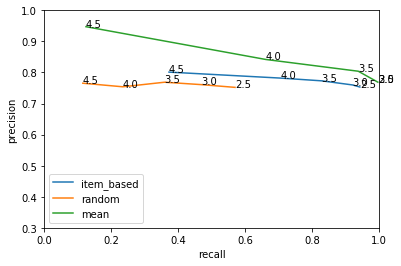

In [16]:
threshold_used = 3.75
threshold_recommended = [2.5, 3.0, 3.5, 4.0, 4.5]


def precisionRecallCurve(matrix, treshold_recommended):
    recommended_matrix = recommended(matrix, treshold_recommended)
    hidden_matrix = hidden(matrix, treshold_recommended)
    used_matrix = used(matrix, threshold_used)
    unused_matrix = unused(matrix, threshold_used)
    confusion_matrix = confusion(recommended_matrix, hidden_matrix, used_matrix, unused_matrix)
    precision_matrix = precision(confusion_matrix)
    recall_matrix = recall(confusion_matrix)
    return (precision_matrix, recall_matrix)



# collaborative filtering
collab_pc = []
collab_rc = []
collab_f1 = []
for threshold in threshold_recommended:
    collab_results = precisionRecallCurve(predicted_item_based, threshold)
    prec = collab_results[0]
    rec = collab_results[1]
    collab_f1.append(2 * ((prec * rec) / (prec + rec)))
    collab_pc.append(prec)
    collab_rc.append(rec)

# plot collab
precisions_collab = collab_pc
recalls_collab = collab_rc
plt.plot(recalls_collab, precisions_collab)
for r, p, t in zip(recalls_collab, precisions_collab, threshold_recommended):
    plt.text(r, p, t)   
    
    

# random
random_pc = []
random_rc = []
random_f1 = []
for threshold in threshold_recommended:
    random_results = precisionRecallCurve(predicted_random, threshold)
    prec = random_results[0]
    rec = random_results[1]
    random_f1.append(2 * ((prec * rec) / (prec + rec)))
    random_pc.append(prec)
    random_rc.append(rec)

# plot random
precisions_random = random_pc
recalls_random = random_rc
plt.plot(recalls_random, precisions_random)
for r, p, t in zip(recalls_random, precisions_random, threshold_recommended):
    plt.text(r, p, t)  



# mean
mean_pc = []
mean_rc = []
mean_f1 = []
for threshold in threshold_recommended:
    mean_results = precisionRecallCurve(predicted_item_mean, threshold)
    prec = mean_results[0]
    rec = mean_results[1]
    mean_f1.append(2 * ((prec * rec) / (prec + rec)))
    mean_pc.append(prec)
    mean_rc.append(rec)

# plot mean
precisions_mean = mean_pc
recalls_mean = mean_rc
plt.plot(recalls_mean, precisions_mean)
for r, p, t in zip(recalls_mean, precisions_mean, threshold_recommended):
    plt.text(r, p, t)  



plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['item_based', 'random', 'mean'], loc = 'lower left')


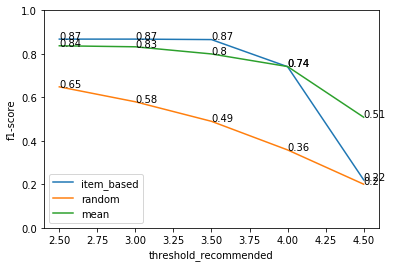

In [17]:
plt.plot(threshold_recommended, mean_f1)
plt.plot(threshold_recommended, random_f1)
plt.plot(threshold_recommended, collab_f1)

for r, f in zip(threshold_recommended, collab_f1):
    plt.text(r, f, round(f, 2))  

for r, f in zip(threshold_recommended, mean_f1):
    plt.text(r, f, round(f, 2))  
    
for r, f in zip(threshold_recommended, random_f1):
    plt.text(r, f, round(f, 2))  
    

plt.ylabel('f1-score')
plt.xlabel('threshold_recommended')

plt.ylim(0, 1)

plt.legend(['item_based', 'random', 'mean'], loc = 'lower left')